In [2]:
import os
import xarray as xr

# Folder where all the .nc files are stored
nc_directory = "../CH_data/CH_output_data/nival_no_regulation"

# List of all .nc files in the directory
nc_files = [os.path.join(nc_directory, f) for f in os.listdir(nc_directory) if f.endswith('.nc')]

# Load each .nc file as an xarray Dataset and compute the mean of each variable
datasets = [xr.open_dataset(f) for f in nc_files]

# Take the mean across all datasets for each variable
mean_ds = xr.concat(datasets, dim="iteration").mean(dim="iteration")

# Display the final dataset with mean values
mean_ds


C:\Users\lauri\anaconda3\envs\CondaNew\lib\site-packages\xarray\core\nanops.py:142: RuntimeWarning: Mean of empty slice
  return np.nanmean(a, axis=axis, dtype=dtype)


<xarray.Dataset>
Dimensions:        (init_date: 9, target_period: 9)
Coordinates:
  * init_date      (init_date) object '01/01' '01/02' ... '01/08' '01/09'
  * target_period  (target_period) object '1Jan-30Sep' ... '1Sep-30Sep'
Data variables:
    R2             (init_date, target_period) float64 0.1173 0.1347 ... 0.1771
    KGE"           (init_date, target_period) float64 -0.03233 ... -0.3637
    KGE"_r         (init_date, target_period) float64 0.1922 0.1103 ... -0.111
    KGE"_alpha     (init_date, target_period) float64 0.4351 0.4569 ... 0.6347
    KGE"_beta      (init_date, target_period) float64 0.01088 ... 0.05008
    perc_diff      (init_date, target_period) float64 2.399 2.467 ... nan 7.116

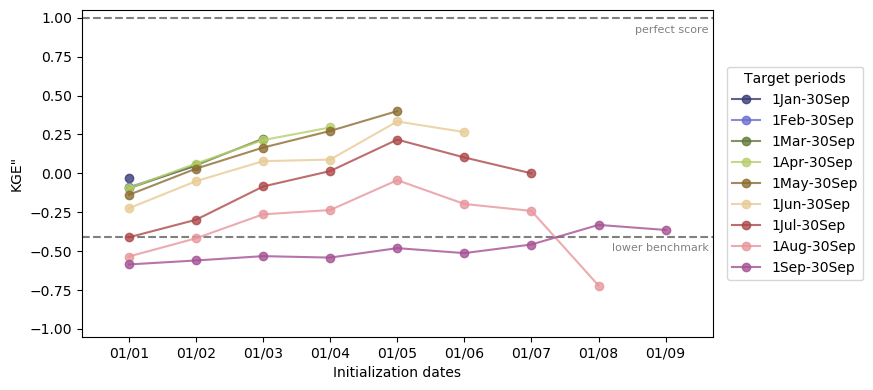

In [3]:
import matplotlib.pyplot as plt
import numpy as np

# Use the mean dataset loaded earlier (mean_ds) for the 'KGE"' data
KGE_mean = mean_ds['KGE"']

# Initialize elements for the plot
fig = plt.figure(figsize=(9, 4))
elem = -1
cmap = plt.cm.get_cmap('tab20b')
rgbas = []
target_periods = mean_ds.target_period.values
init_dates = mean_ds.init_date.values

# Loop over the target periods to plot
for t in target_periods:
    elem += 1
    rgba = cmap((1 * elem) / len(target_periods))
    rgbas.append(rgba)

    # Select and plot the KGE" mean data for each target period
    toplot = KGE_mean.sel(target_period=t)
    plt.plot(np.arange(len(toplot.init_date)), toplot.values, marker='o', color=rgba, alpha=.8, label=t)

# Add elements to the plot
plt.ylim(-1.05, 1.05)
plt.xlim(-.7, len(init_dates) - .3)
plt.plot([-.7, len(init_dates) - .3], [-.41, -.41], color='grey', ls='--', zorder=1)
plt.annotate('lower benchmark', (len(init_dates) - 1.8, -.5), color='grey', fontsize=8)
plt.plot([-.7, len(init_dates) - .3], [1, 1], color='grey', ls='--', zorder=1)
plt.annotate('perfect score', (len(init_dates) - 1.45, .9), color='grey', fontsize=8)
plt.xticks(np.arange(0, len(init_dates)), init_dates)
plt.xlabel('Initialization dates')
plt.ylabel('KGE"')
plt.legend(title='Target periods', loc='center right', bbox_to_anchor=(1.25, .5))
plt.tight_layout()

# Display the plot
plt.show()

In [4]:
# Save the figure
fig.savefig('../CH_data/CH_output_plots/evaluation/KGE_nival_no_regulation_mean.png', dpi=300)

In [5]:
# List of all .nc files in the directory
nc_files = [os.path.join(nc_directory, f) for f in os.listdir(nc_directory) if f.endswith('.nc')]

# Load each .nc file as an xarray Dataset and compute the median of each variable
datasets = [xr.open_dataset(f) for f in nc_files]

# Take the median across all datasets for each variable
median_ds = xr.concat(datasets, dim="iteration").median(dim="iteration")

# Display the final dataset with median values
median_ds

<xarray.Dataset>
Dimensions:        (init_date: 9, target_period: 9)
Coordinates:
  * init_date      (init_date) object '01/01' '01/02' ... '01/08' '01/09'
  * target_period  (target_period) object '1Jan-30Sep' ... '1Sep-30Sep'
Data variables:
    R2             (init_date, target_period) float64 0.07 0.06 ... nan 0.14
    KGE"           (init_date, target_period) float64 -0.01 -0.04 ... nan -0.45
    KGE"_r         (init_date, target_period) float64 0.22 0.16 ... nan -0.21
    KGE"_alpha     (init_date, target_period) float64 0.42 0.44 ... nan 0.37
    KGE"_beta      (init_date, target_period) float64 -0.0 0.01 0.0 ... nan 0.04
    perc_diff      (init_date, target_period) float64 1.795 1.975 ... nan 6.515

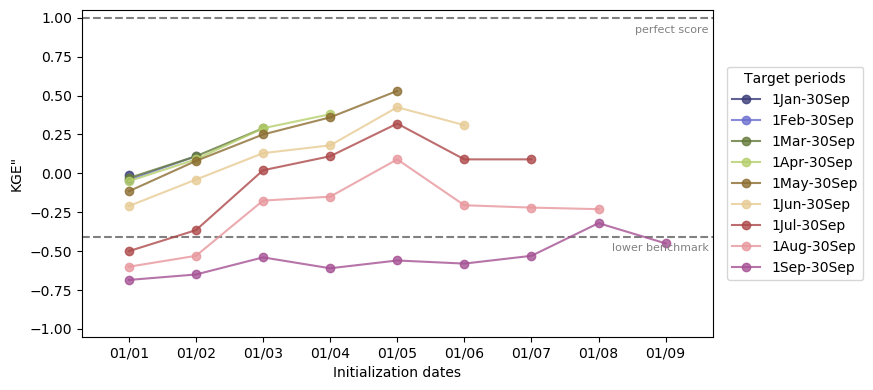

In [6]:
import matplotlib.pyplot as plt
import numpy as np

# Use the median dataset loaded earlier (median_ds) for the 'KGE"' data
KGE_median = median_ds['KGE"']

# Initialize elements for the plot
fig = plt.figure(figsize=(9, 4))
elem = -1
cmap = plt.cm.get_cmap('tab20b')
rgbas = []
target_periods = median_ds.target_period.values
init_dates = median_ds.init_date.values

# Loop over the target periods to plot
for t in target_periods:
    elem += 1
    rgba = cmap((1 * elem) / len(target_periods))
    rgbas.append(rgba)

    # Select and plot the KGE" median data for each target period
    toplot = KGE_median.sel(target_period=t)
    plt.plot(np.arange(len(toplot.init_date)), toplot.values, marker='o', color=rgba, alpha=.8, label=t)

# Add elements to the plot
plt.ylim(-1.05, 1.05)
plt.xlim(-.7, len(init_dates) - .3)
plt.plot([-.7, len(init_dates) - .3], [-.41, -.41], color='grey', ls='--', zorder=1)
plt.annotate('lower benchmark', (len(init_dates) - 1.8, -.5), color='grey', fontsize=8)
plt.plot([-.7, len(init_dates) - .3], [1, 1], color='grey', ls='--', zorder=1)
plt.annotate('perfect score', (len(init_dates) - 1.45, .9), color='grey', fontsize=8)
plt.xticks(np.arange(0, len(init_dates)), init_dates)
plt.xlabel('Initialization dates')
plt.ylabel('KGE"')
plt.legend(title='Target periods', loc='center right', bbox_to_anchor=(1.25, .5))
plt.tight_layout()

# Display the plot
plt.show()


In [7]:
# Save the figure
fig.savefig('../CH_data/CH_output_plots/evaluation/KGE_nival_no_regulation_median.png', dpi=300)

<xarray.Dataset>
Dimensions:        (init_date: 9, target_period: 9)
Coordinates:
  * init_date      (init_date) object '01/01' '01/02' ... '01/08' '01/09'
  * target_period  (target_period) object '1Jan-30Sep' ... '1Sep-30Sep'
Data variables:
    R2             (init_date, target_period) float64 0.07 0.1 0.06 ... nan 0.14
    KGE"           (init_date, target_period) float64 -0.25 -0.42 ... nan -0.56
    KGE"_r         (init_date, target_period) float64 -0.02 -0.19 ... nan -0.34
    KGE"_alpha     (init_date, target_period) float64 0.31 0.29 ... nan 0.24
    KGE"_beta      (init_date, target_period) float64 0.0 0.01 ... nan -0.02
    perc_diff      (init_date, target_period) float64 2.11 2.825 ... nan 6.86


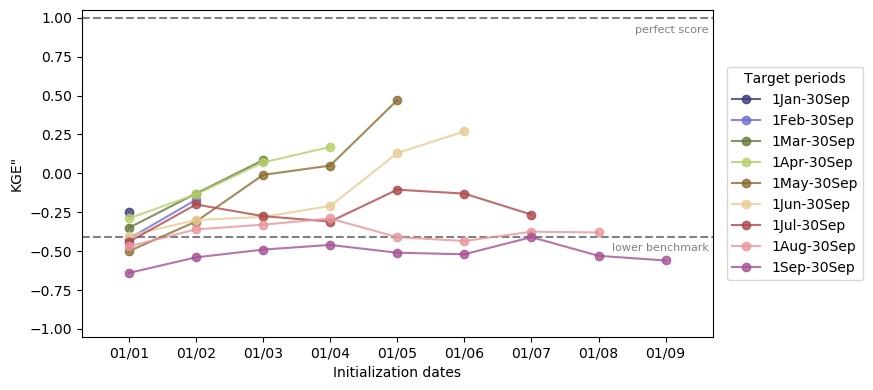

In [8]:
nc_directory_2 = "../CH_data/CH_output_data/nival_high_regulation"

# List of all .nc files in the directory
nc_files = [os.path.join(nc_directory_2, f) for f in os.listdir(nc_directory_2) if f.endswith('.nc')]

# Load each .nc file as an xarray Dataset and compute the median of each variable
datasets = [xr.open_dataset(f) for f in nc_files]

# Take the median across all datasets for each variable
median_ds = xr.concat(datasets, dim="iteration").median(dim="iteration")

# Display the final dataset with median values
print(median_ds)

# Use the median dataset loaded earlier (median_ds) for the 'KGE"' data
KGE_median = median_ds['KGE"']

# Initialize elements for the plot
fig = plt.figure(figsize=(9, 4))
elem = -1
cmap = plt.cm.get_cmap('tab20b')
rgbas = []
target_periods = median_ds.target_period.values
init_dates = median_ds.init_date.values

# Loop over the target periods to plot
for t in target_periods:
    elem += 1
    rgba = cmap((1 * elem) / len(target_periods))
    rgbas.append(rgba)

    # Select and plot the KGE" median data for each target period
    toplot = KGE_median.sel(target_period=t)
    plt.plot(np.arange(len(toplot.init_date)), toplot.values, marker='o', color=rgba, alpha=.8, label=t)

# Add elements to the plot
plt.ylim(-1.05, 1.05)
plt.xlim(-.7, len(init_dates) - .3)
plt.plot([-.7, len(init_dates) - .3], [-.41, -.41], color='grey', ls='--', zorder=1)
plt.annotate('lower benchmark', (len(init_dates) - 1.8, -.5), color='grey', fontsize=8)
plt.plot([-.7, len(init_dates) - .3], [1, 1], color='grey', ls='--', zorder=1)
plt.annotate('perfect score', (len(init_dates) - 1.45, .9), color='grey', fontsize=8)
plt.xticks(np.arange(0, len(init_dates)), init_dates)
plt.xlabel('Initialization dates')
plt.ylabel('KGE"')
plt.legend(title='Target periods', loc='center right', bbox_to_anchor=(1.25, .5))
plt.tight_layout()

# Display the plot
plt.show()

In [9]:
# Save the figure
fig.savefig('../CH_data/CH_output_plots/evaluation/KGE_nival_high_regulation_median.png', dpi=300)

<xarray.Dataset>
Dimensions:        (init_date: 9, target_period: 9)
Coordinates:
  * init_date      (init_date) object '01/01' '01/02' ... '01/08' '01/09'
  * target_period  (target_period) object '1Jan-30Sep' ... '1Sep-30Sep'
Data variables:
    R2             (init_date, target_period) float64 0.06 0.12 ... nan 0.06
    KGE"           (init_date, target_period) float64 -0.06 0.015 ... nan -0.31
    KGE"_r         (init_date, target_period) float64 0.155 0.21 ... nan 0.03
    KGE"_alpha     (init_date, target_period) float64 0.39 0.39 ... nan 0.29
    KGE"_beta      (init_date, target_period) float64 -0.02 -0.03 ... nan 0.05
    perc_diff      (init_date, target_period) float64 1.2 0.89 1.08 ... nan 5.32


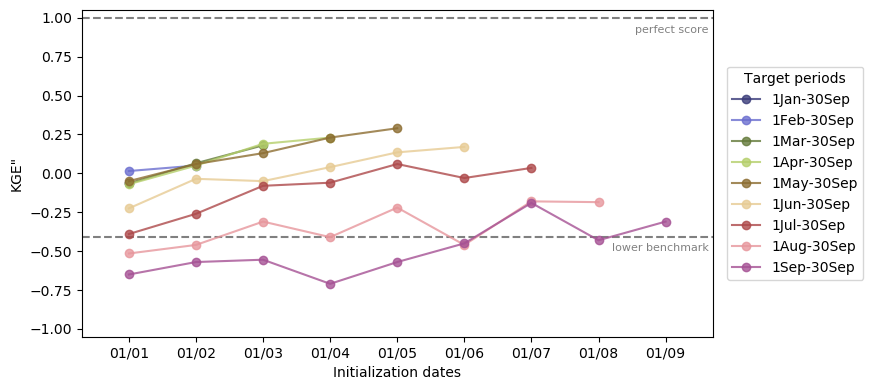

In [10]:
n_low_reg_path = "../CH_data/CH_output_data/nival_low_regulation"

# List of all .nc files in the directory
nc_files = [os.path.join(n_low_reg_path, f) for f in os.listdir(n_low_reg_path) if f.endswith('.nc')]

# Load each .nc file as an xarray Dataset and compute the median of each variable
datasets = [xr.open_dataset(f) for f in nc_files]

# Take the median across all datasets for each variable
median_ds = xr.concat(datasets, dim="iteration").median(dim="iteration")

# Display the final dataset with median values
print(median_ds)

# Use the median dataset loaded earlier (median_ds) for the 'KGE"' data
KGE_median = median_ds['KGE"']

# Initialize elements for the plot
fig = plt.figure(figsize=(9, 4))
elem = -1
cmap = plt.cm.get_cmap('tab20b')
rgbas = []
target_periods = median_ds.target_period.values
init_dates = median_ds.init_date.values

# Loop over the target periods to plot
for t in target_periods:
    elem += 1
    rgba = cmap((1 * elem) / len(target_periods))
    rgbas.append(rgba)

    # Select and plot the KGE" median data for each target period
    toplot = KGE_median.sel(target_period=t)
    plt.plot(np.arange(len(toplot.init_date)), toplot.values, marker='o', color=rgba, alpha=.8, label=t)

# Add elements to the plot
plt.ylim(-1.05, 1.05)
plt.xlim(-.7, len(init_dates) - .3)
plt.plot([-.7, len(init_dates) - .3], [-.41, -.41], color='grey', ls='--', zorder=1)
plt.annotate('lower benchmark', (len(init_dates) - 1.8, -.5), color='grey', fontsize=8)
plt.plot([-.7, len(init_dates) - .3], [1, 1], color='grey', ls='--', zorder=1)
plt.annotate('perfect score', (len(init_dates) - 1.45, .9), color='grey', fontsize=8)
plt.xticks(np.arange(0, len(init_dates)), init_dates)
plt.xlabel('Initialization dates')
plt.ylabel('KGE"')
plt.legend(title='Target periods', loc='center right', bbox_to_anchor=(1.25, .5))
plt.tight_layout()

# Display the plot
plt.show()

In [11]:
fig.savefig('../CH_data/CH_output_plots/evaluation/KGE_nival_low_regulation_median.png', dpi=300)

<xarray.Dataset>
Dimensions:        (init_date: 9, target_period: 9)
Coordinates:
  * init_date      (init_date) object '01/01' '01/02' ... '01/08' '01/09'
  * target_period  (target_period) object '1Jan-30Sep' ... '1Sep-30Sep'
Data variables:
    R2             (init_date, target_period) float64 0.07 0.1 0.09 ... nan 0.11
    KGE"           (init_date, target_period) float64 -0.12 -0.16 ... nan -0.48
    KGE"_r         (init_date, target_period) float64 0.12 0.05 ... nan -0.22
    KGE"_alpha     (init_date, target_period) float64 0.36 0.36 ... nan 0.27
    KGE"_beta      (init_date, target_period) float64 0.0 0.0 -0.01 ... nan 0.03
    perc_diff      (init_date, target_period) float64 1.73 1.93 1.9 ... nan 6.41


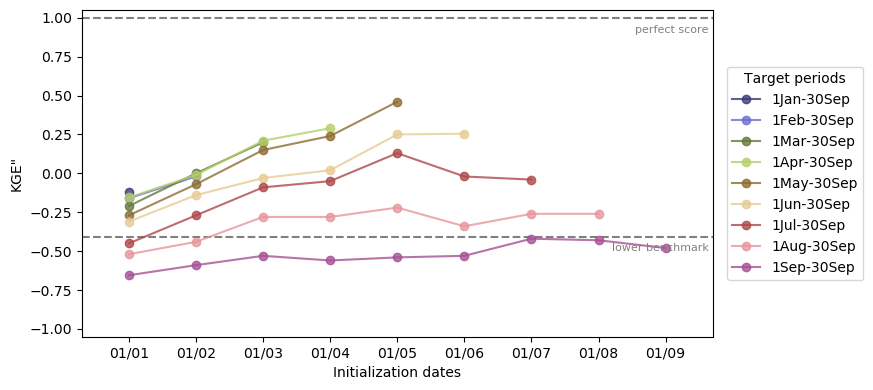

In [12]:
nival_path = "../CH_data/CH_output_data/nival"

# List of all .nc files in the directory
nc_files = [os.path.join(nival_path, f) for f in os.listdir(nival_path) if f.endswith('.nc')]

# Load each .nc file as an xarray Dataset and compute the median of each variable
datasets = [xr.open_dataset(f) for f in nc_files]

# Take the median across all datasets for each variable
median_ds = xr.concat(datasets, dim="iteration").median(dim="iteration")

# Display the final dataset with median values
print(median_ds)

# Use the median dataset loaded earlier (median_ds) for the 'KGE"' data
KGE_median = median_ds['KGE"']

# Initialize elements for the plot
fig = plt.figure(figsize=(9, 4))
elem = -1
cmap = plt.cm.get_cmap('tab20b')
rgbas = []
target_periods = median_ds.target_period.values
init_dates = median_ds.init_date.values

# Loop over the target periods to plot
for t in target_periods:
    elem += 1
    rgba = cmap((1 * elem) / len(target_periods))
    rgbas.append(rgba)

    # Select and plot the KGE" median data for each target period
    toplot = KGE_median.sel(target_period=t)
    plt.plot(np.arange(len(toplot.init_date)), toplot.values, marker='o', color=rgba, alpha=.8, label=t)

# Add elements to the plot
plt.ylim(-1.05, 1.05)
plt.xlim(-.7, len(init_dates) - .3)
plt.plot([-.7, len(init_dates) - .3], [-.41, -.41], color='grey', ls='--', zorder=1)
plt.annotate('lower benchmark', (len(init_dates) - 1.8, -.5), color='grey', fontsize=8)
plt.plot([-.7, len(init_dates) - .3], [1, 1], color='grey', ls='--', zorder=1)
plt.annotate('perfect score', (len(init_dates) - 1.45, .9), color='grey', fontsize=8)
plt.xticks(np.arange(0, len(init_dates)), init_dates)
plt.xlabel('Initialization dates')
plt.ylabel('KGE"')
plt.legend(title='Target periods', loc='center right', bbox_to_anchor=(1.25, .5))
plt.tight_layout()

# Display the plot
plt.show()

In [13]:
fig.savefig('../CH_data/CH_output_plots/evaluation/KGE_nival_median.png', dpi=300)

<xarray.Dataset>
Dimensions:        (init_date: 9, target_period: 9)
Coordinates:
  * init_date      (init_date) object '01/01' '01/02' ... '01/08' '01/09'
  * target_period  (target_period) object '1Jan-30Sep' ... '1Sep-30Sep'
Data variables:
    R2             (init_date, target_period) float64 0.07 0.09 0.1 ... nan 0.09
    KGE"           (init_date, target_period) float64 -0.02 -0.03 ... nan -0.41
    KGE"_r         (init_date, target_period) float64 0.21 0.18 ... nan -0.105
    KGE"_alpha     (init_date, target_period) float64 0.41 0.43 ... nan 0.33
    KGE"_beta      (init_date, target_period) float64 0.0 -0.01 0.0 ... nan 0.05
    perc_diff      (init_date, target_period) float64 1.465 1.52 ... nan 6.19


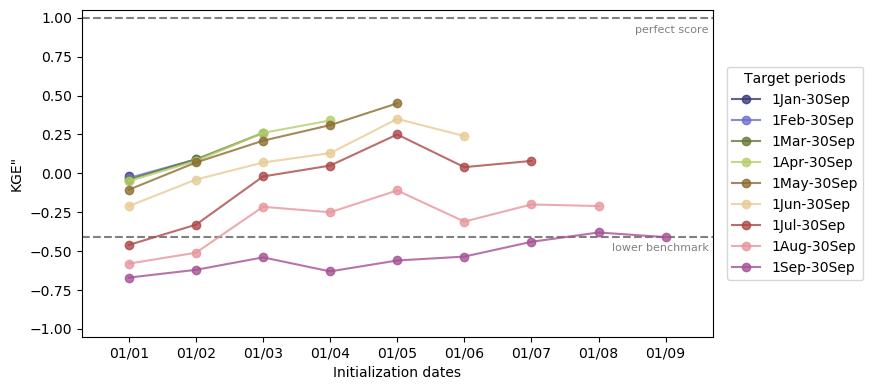

In [14]:
n_l_and_n_reg_path = "../CH_data/CH_output_data/nival_low_and_no_reg"

# List of all .nc files in the directory
nc_files = [os.path.join(n_l_and_n_reg_path, f) for f in os.listdir(n_l_and_n_reg_path) if f.endswith('.nc')]

# Load each .nc file as an xarray Dataset and compute the median of each variable
datasets = [xr.open_dataset(f) for f in nc_files]

# Take the median across all datasets for each variable
median_ds = xr.concat(datasets, dim="iteration").median(dim="iteration")

# Display the final dataset with median values
print(median_ds)

# Use the median dataset loaded earlier (median_ds) for the 'KGE"' data
KGE_median = median_ds['KGE"']

# Initialize elements for the plot
fig = plt.figure(figsize=(9, 4))
elem = -1
cmap = plt.cm.get_cmap('tab20b')
rgbas = []
target_periods = median_ds.target_period.values
init_dates = median_ds.init_date.values

# Loop over the target periods to plot
for t in target_periods:
    elem += 1
    rgba = cmap((1 * elem) / len(target_periods))
    rgbas.append(rgba)

    # Select and plot the KGE" median data for each target period
    toplot = KGE_median.sel(target_period=t)
    plt.plot(np.arange(len(toplot.init_date)), toplot.values, marker='o', color=rgba, alpha=.8, label=t)

# Add elements to the plot
plt.ylim(-1.05, 1.05)
plt.xlim(-.7, len(init_dates) - .3)
plt.plot([-.7, len(init_dates) - .3], [-.41, -.41], color='grey', ls='--', zorder=1)
plt.annotate('lower benchmark', (len(init_dates) - 1.8, -.5), color='grey', fontsize=8)
plt.plot([-.7, len(init_dates) - .3], [1, 1], color='grey', ls='--', zorder=1)
plt.annotate('perfect score', (len(init_dates) - 1.45, .9), color='grey', fontsize=8)
plt.xticks(np.arange(0, len(init_dates)), init_dates)
plt.xlabel('Initialization dates')
plt.ylabel('KGE"')
plt.legend(title='Target periods', loc='center right', bbox_to_anchor=(1.25, .5))
plt.tight_layout()

# Display the plot
plt.show()

In [15]:
fig.savefig('../CH_data/CH_output_plots/evaluation/KGE_n_limited_reg_median.png', dpi=300)

<xarray.Dataset>
Dimensions:        (init_date: 9, target_period: 9)
Coordinates:
  * init_date      (init_date) object '01/01' '01/02' ... '01/08' '01/09'
  * target_period  (target_period) object '1Jan-30Sep' ... '1Sep-30Sep'
Data variables:
    R2             (init_date, target_period) float64 0.05 0.05 ... nan 0.08
    KGE"           (init_date, target_period) float64 -0.02 -0.0 ... nan -0.37
    KGE"_r         (init_date, target_period) float64 0.18 0.2 0.19 ... nan 0.06
    KGE"_alpha     (init_date, target_period) float64 0.41 0.43 ... nan 0.68
    KGE"_beta      (init_date, target_period) float64 -0.01 0.01 ... nan 0.03
    perc_diff      (init_date, target_period) float64 2.98 3.24 ... nan 7.435


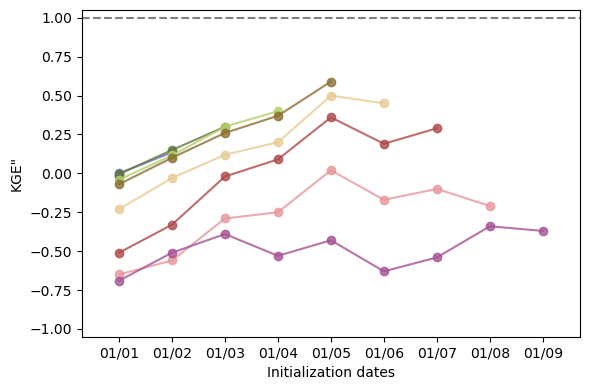

In [16]:
#nival, regulation below 0 (low and no) and glacieted area below 10%

nival_limited_reg_and_glac = "../CH_data/CH_output_data/nival_limited_reg_and_glac"

# List of all .nc files in the directory
nc_files = [os.path.join(nival_limited_reg_and_glac, f) for f in os.listdir(nival_limited_reg_and_glac) if f.endswith('.nc')]

# Load each .nc file as an xarray Dataset and compute the median of each variable
datasets = [xr.open_dataset(f) for f in nc_files]

# Take the median across all datasets for each variable
median_ds = xr.concat(datasets, dim="iteration").median(dim="iteration")

# Display the final dataset with median values
print(median_ds)

# Use the median dataset loaded earlier (median_ds) for the 'KGE"' data
KGE_median = median_ds['KGE"']

# Initialize elements for the plot
fig = plt.figure(figsize=(6, 4))
elem = -1
cmap = plt.cm.get_cmap('tab20b')
rgbas = []
target_periods = median_ds.target_period.values
init_dates = median_ds.init_date.values

# Loop over the target periods to plot
for t in target_periods:
    elem += 1
    rgba = cmap((1 * elem) / len(target_periods))
    rgbas.append(rgba)

    # Select and plot the KGE" median data for each target period
    toplot = KGE_median.sel(target_period=t)
    plt.plot(np.arange(len(toplot.init_date)), toplot.values, marker='o', color=rgba, alpha=.8, label=t)

# Add elements to the plot
plt.ylim(-1.05, 1.05)
plt.xlim(-.7, len(init_dates) - .3)
#plt.plot([-.7, len(init_dates) - .3], [-.41, -.41], color='grey', ls='--', zorder=1)
#plt.annotate('lower benchmark', (len(init_dates) - 1.8, -.5), color='grey', fontsize=8)
plt.plot([-.7, len(init_dates) - .3], [1, 1], color='grey', ls='--', zorder=1)
#plt.annotate('perfect score', (len(init_dates) - 1.45, .9), color='grey', fontsize=8)
plt.xticks(np.arange(0, len(init_dates)), init_dates)
plt.xlabel('Initialization dates')
plt.ylabel('KGE"')
#plt.legend(title='Target periods', loc='center right', bbox_to_anchor=(1.25, .5))
plt.tight_layout()

# Display the plot
plt.show()



In [17]:
fig.savefig('../CH_data/CH_output_plots/evaluation/KGE_n_limited_reg_and_glac_median1.png', dpi=300)

<xarray.Dataset>
Dimensions:        (init_date: 9, target_period: 9)
Coordinates:
  * init_date      (init_date) object '01/01' '01/02' ... '01/08' '01/09'
  * target_period  (target_period) object '1Jan-30Sep' ... '1Sep-30Sep'
Data variables:
    R2             (init_date, target_period) float64 0.045 0.04 ... nan 0.03
    KGE"           (init_date, target_period) float64 -0.06 -0.08 ... nan -0.3
    KGE"_r         (init_date, target_period) float64 0.13 0.14 ... nan -0.06
    KGE"_alpha     (init_date, target_period) float64 0.41 0.41 ... nan 0.29
    KGE"_beta      (init_date, target_period) float64 -0.01 0.01 ... nan 0.0
    perc_diff      (init_date, target_period) float64 2.995 3.22 ... nan 7.025
<xarray.Dataset>
Dimensions:        (init_date: 9, target_period: 9)
Coordinates:
  * init_date      (init_date) object '01/01' '01/02' ... '01/08' '01/09'
  * target_period  (target_period) object '1Jan-30Sep' ... '1Sep-30Sep'
Data variables:
    R2             (init_date, target_period

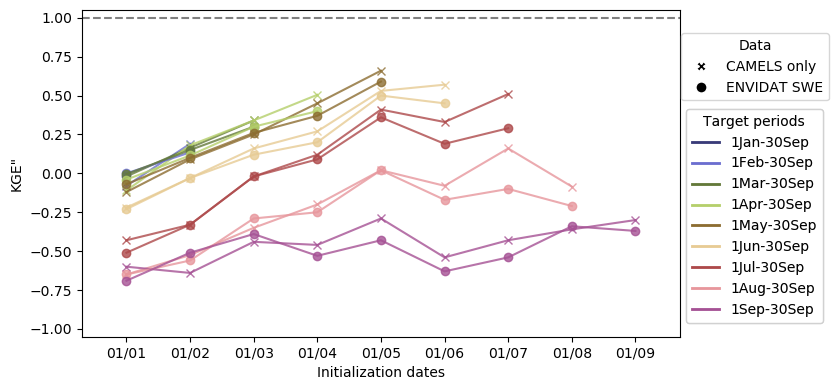

In [53]:
# Camels only nival, regulation below 0 (low and no) and glacieted area below 10%
# comparison to envidat
from matplotlib.lines import Line2D
import matplotlib.pyplot as plt

C_nival_limited_reg_and_glac = "../CH_data/CH_camels_output_data/nival_limited_reg_and_glac"
nival_limited_reg_and_glac = "../CH_data/CH_output_data/nival_limited_reg_and_glac"

# List of all .nc files in the directory
C_nc_files = [os.path.join(C_nival_limited_reg_and_glac, f) for f in os.listdir(C_nival_limited_reg_and_glac) if f.endswith('.nc')]
nc_files = [os.path.join(nival_limited_reg_and_glac, f) for f in os.listdir(nival_limited_reg_and_glac) if f.endswith('.nc')]

# Load each .nc file as an xarray Dataset and compute the median of each variable
C_datasets = [xr.open_dataset(f) for f in C_nc_files]
datasets = [xr.open_dataset(f) for f in nc_files]

# Take the median across all datasets for each variable
C_median_ds = xr.concat(C_datasets, dim="iteration").median(dim="iteration")
median_ds = xr.concat(datasets, dim="iteration").median(dim="iteration")

# Display the final dataset with median values
print(C_median_ds)
print(median_ds)

# Use the median dataset loaded earlier (median_ds) for the 'KGE"' data
C_KGE_median = C_median_ds['KGE"']
KGE_median = median_ds['KGE"']

# Initialize elements for the plot
fig = plt.figure(figsize=(7, 4))
elem = -1
cmap = plt.cm.get_cmap('tab20b')
rgbas = []
target_periods = median_ds.target_period.values
init_dates = median_ds.init_date.values

# Camels Loop over the target periods to plot
for t in target_periods:
    elem += 1
    rgba = cmap((1 * elem) / len(target_periods))
    rgbas.append(rgba)

    # Select and plot the KGE" median data for each target period
    toplot = C_KGE_median.sel(target_period=t)
    plt.plot(np.arange(len(toplot.init_date)), toplot.values, marker='x', color=rgba, alpha=.8, label=t)
    
# Reset elem counter for consistent colors
elem = -1
# Envidat Loop over the target periods to plot
for t in target_periods:
    elem += 1
    rgba = cmap((1 * elem) / len(target_periods))
    rgbas.append(rgba)

    # Select and plot the KGE" median data for each target period
    toplot = KGE_median.sel(target_period=t)
    plt.plot(np.arange(len(toplot.init_date)), toplot.values, marker='o', color=rgba, alpha=.8, label=t)    


# Data sources legend
custom_lines = [Line2D([0], [0], marker='X', color='w', markerfacecolor='black', markersize=7, label='CAMELS only'),
                Line2D([0], [0], marker='o', color='w', markerfacecolor='black', markersize=8, label='ENVIDAT SWE')]

# Target periods legend
target_lines = [Line2D([0], [0], color=rgba, lw=2, label=str(t)) for t, rgba in zip(target_periods, rgbas[:len(target_periods)])]

# Add legends to the plot with adjusted positions
legend1 = plt.legend(handles=custom_lines, title='Data', loc='upper right', bbox_to_anchor=(1.26, 0.95))  # Move higher
legend2 = plt.legend(handles=target_lines, title='Target periods', loc='center right', bbox_to_anchor=(1.25, 0.37))  # Move lower

# Add legends to plot
plt.gca().add_artist(legend1)
plt.gca().add_artist(legend2)

# Add elements to the plot
plt.ylim(-1.05, 1.05)
plt.xlim(-.7, len(init_dates) - .3)
#plt.plot([-.7, len(init_dates) - .3], [-.41, -.41], color='grey', ls='--', zorder=1)
#plt.annotate('lower benchmark', (len(init_dates) - 1.8, -.5), color='grey', fontsize=8)
plt.plot([-.7, len(init_dates) - .3], [1, 1], color='grey', ls='--', zorder=1)
#plt.annotate('perfect score', (len(init_dates) - 1.45, .9), color='grey', fontsize=8)
plt.xticks(np.arange(0, len(init_dates)), init_dates)
plt.xlabel('Initialization dates')
plt.ylabel('KGE"')
#plt.legend(title='Target periods', loc='center right', bbox_to_anchor=(1.25, .5))
plt.tight_layout()

# Display the plot
plt.show()


In [54]:
fig.savefig('../CH_data/CH_output_plots/evaluation/KGE_n_limited_comparison_median.png', dpi=300, bbox_inches='tight')
